In [1211]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import os
import seaborn as sns
from collections import defaultdict, Counter

In [1212]:
data = []
for f in os.listdir(os.getcwd()):
    if "Zip" in f:
        data.append((f, pd.read_csv(f)))
        

In [1213]:
def extract_relevant(df):
    df = df[df["City"] =="New York"]
    cols = list(df.columns)
    rel_cols = cols[:6]
    years = [val for val in cols if "2015" in val]
    
    df = df[rel_cols + years]
    
    return df

In [1214]:
for i,item in enumerate(data):
    name, df = item
    dfHouse =extract_relevant(df)
    data[i] = (name, dfHouse)

In [1215]:
total = Counter()
bank_data = []
counters = []
for f in os.listdir(os.getcwd()):
    if "bank_picks" in f:
        month =  f[11:13]
        df = pd.read_csv(f)
        
        df = df.drop_duplicates(subset=["zip_code"])
        SS = pd.Series(data=df["count"].values, index = df.zip_code.values)
        counters.append(Counter(SS.to_dict()))
        total += Counter(SS.to_dict())
        bank_data.append((month,Counter(SS.to_dict())))
        bank_data = sorted(bank_data)

In [1223]:
def process_data(series):
    df = pd.DataFrame({"counts":series.values(),"zip_code":series.keys()})
    df = df.sort_values("counts",ascending=False)
    df.loc[:,"percent"]= 100*df["counts"]/df["counts"].sum()
    df = df[df["percent"]>0.05]
    df = df[(df["zip_code"]!= 11371) & (df["zip_code"]!= 11430)]
    df.loc[:,"normalize"] = (df["percent"]-df["percent"].mean())/df["percent"].std()
    return df
    

In [1224]:
dfTotal = process_data(total)

In [1232]:
try:
    for i,item in enumerate(bank_data):
        name, series = item
        df = process_data(series)
        bank_data[i] = (name, df)
except:
    pass

In [1233]:
meadian_sold = [val[1] for val in data if "MedianList" in val[0]][0]

In [1237]:
dfMerged = pd.merge(dfTotal, meadian_sold,left_on = "zip_code",right_on="RegionName",how = 'left')

In [1238]:
dfMerged.loc[:,"mean"] = dfMerged.iloc[:,10:].mean(axis = 1)

In [1239]:
dfMerged.sort_values("zip_code")

,counts,zip_code,percent,normalize,RegionName,City,State,Metro,CountyName,SizeRank,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,mean
1,159438.0,10001.0,7.501539,2.252869,10001.0,New York,NY,New York,New York,2213.0,...,1775.769644,1764.863307,1775.223499,1773.028416,1775.223499,1770.833333,1851.329152,1878.152754,1879.304240,1801.895134
29,11383.0,10002.0,0.535569,-0.720601,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,88693.0,10003.0,4.172995,0.832058,10003.0,New York,NY,New York,New York,33.0,...,1781.472684,1778.514120,1797.040169,1803.183024,1833.333333,1817.484991,1815.789474,1825.954621,1809.563067,1806.409787
27,11717.0,10004.0,0.551283,-0.713893,10004.0,New York,NY,New York,New York,9660.0,...,1429.746309,1442.835314,1382.500000,1381.250000,1424.501425,1509.054326,1525.582011,1515.883392,1585.758187,1455.332798
24,13082.0,10005.0,0.615507,-0.686479,10005.0,New York,NY,New York,New York,7130.0,...,1328.337875,1330.343797,1342.161775,1374.483471,1341.592702,1388.888889,1418.070587,1452.282158,1452.469982,1368.135219
30,3971.0,10006.0,0.186835,-0.869460,10006.0,New York,NY,New York,New York,9493.0,...,1917.613636,1960.000000,1987.281399,2061.182681,2061.182681,2079.493088,2103.960396,2079.493088,2104.687571,2019.183726
22,15564.0,10007.0,0.732284,-0.636632,10007.0,New York,NY,New York,New York,8876.0,...,NaN,NaN,2685.984662,2685.984662,2766.439746,2753.696135,2795.561990,2802.816901,2802.581736,2756.152262
21,22143.0,10009.0,1.041825,-0.504502,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,76088.0,10010.0,3.579931,0.578905,10010.0,New York,NY,New York,New York,785.0,...,1893.564356,1907.377696,1907.377696,1942.896936,1968.948287,2031.335899,1983.943534,1961.823966,1950.886767,1927.700103
9,92650.0,10011.0,4.359171,0.911529,10011.0,New York,NY,New York,New York,25.0,...,2358.490566,2405.714286,2410.575428,2385.578132,2472.435683,2464.985994,2449.455677,2464.985994,2479.076874,2421.529305


In [815]:
df10001 = dfMerged[dfMerged["zip_code"]==10001]

In [833]:
vals = [val[1] for val in bank_data]
yC = [df[df["zip_code"]==10001]["counts"].values[0] for df in vals]

In [854]:
yCNorm = [val/max(yC) for val in yC]

In [850]:
yP = list(df10001.iloc[:,10:-1].values[0])

In [858]:
yPNorm = [val/max(yP[2:]) for val in yP]

In [859]:
yPNorm

[nan,
 nan,
 0.94461740750009349,
 0.94490801774000199,
 0.93910462667595618,
 0.94461740750009349,
 0.94344937788200578,
 0.94461740750009349,
 0.94228134826391818,
 0.98511412471041104,
 0.99938728040554214,
 1.0]

In [851]:
df10001.iloc[:,10:-1]

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
1,NaN,NaN,1775.223499,1775.769644,1764.863307,1775.223499,1773.028416,1775.223499,1770.833333,1851.329152,1878.152754,1879.30424


In [852]:
len(yP)

12

In [907]:
for item in bank_data:
    print item[1].shape

(90, 4)
(100, 4)
(89, 4)
(92, 4)
(94, 4)
(91, 4)
(88, 4)
(87, 4)
(89, 4)
(88, 4)
(85, 4)
(87, 4)


In [915]:
merged = []
for item in bank_data:
    name,df = item
    price = meadian_sold[["RegionName","2015-"+name]]
    dfMerge = pd.merge(df, price,left_on = "zip_code",right_on="RegionName")
    dfMerge.dropna(subset = ["2015-"+name],inplace=True)
    dfMerge.columns = ["counts","zip_code","percent","normalize","RegionName","price"]
    merged.append(dfMerge)
    

In [916]:
useable_data = [set(item.zip_code.values) for item in merged]

In [917]:
inter = useable_data[0]
for i in range(1,len(useable_data)):
    inter = inter.intersection(useable_data[i])

In [918]:
inter = list(inter)

In [919]:
merged = [df[df["zip_code"].isin(inter)]for df in merged]

In [709]:
meadian_sold.loc[:,"mean_price"] = meadian_sold.iloc[:,6:].mean(axis = 1)

In [710]:
meadian_sold.dropna(subset=["mean_price"], inplace=True)

In [711]:
meadian_sold.sort_values("RegionName");

In [712]:
zillow_plus = pd.merge(meadian_sold,zillow, on = "RegionName")

In [713]:
merged = pd.merge(dfB,meadian_sold,left_on = ["zip_code"], right_on = ["RegionName"])

In [714]:
merged.shape

(54, 23)

In [693]:
zillow_plus.shape

(73, 20)

In [694]:
meadian_sold.shape

(102, 19)

In [865]:
from sklearn import linear_model,neighbors,base
from sklearn.cross_validation import train_test_split
from sklearn import pipeline
from sklearn import cross_validation, grid_search
import numpy as np

In [921]:
for i,df in enumerate(merged):
    print i,df.shape

0 (40, 6)
1 (40, 6)
2 (40, 6)
3 (40, 6)
4 (40, 6)
5 (40, 6)
6 (40, 6)
7 (40, 6)
8 (40, 6)
9 (40, 6)
10 (40, 6)
11 (40, 6)


In [1003]:
merged[0]["counts"].values

array([  7.09600000e+03,   5.96300000e+03,   5.48400000e+03,
         5.14500000e+03,   4.78000000e+03,   4.45800000e+03,
         3.97600000e+03,   3.89200000e+03,   3.55600000e+03,
         3.36100000e+03,   3.06600000e+03,   3.05700000e+03,
         2.52800000e+03,   2.48700000e+03,   1.63300000e+03,
         6.00000000e+02,   5.98000000e+02,   5.20000000e+02,
         5.14000000e+02,   5.05000000e+02,   4.88000000e+02,
         1.57000000e+02,   1.54000000e+02,   1.35000000e+02,
         1.30000000e+02,   1.29000000e+02,   7.60000000e+01,
         5.20000000e+01,   5.10000000e+01,   5.10000000e+01,
         4.00000000e+01,   2.20000000e+01,   1.60000000e+01,
         9.00000000e+00,   8.00000000e+00,   8.00000000e+00,
         7.00000000e+00,   7.00000000e+00,   5.00000000e+00,
         5.00000000e+00])

In [1008]:
merged = [df.reset_index(drop = True) for df in merged]

In [1013]:
df["price"].values

array([ 1601.1011011 ,  1780.97345133,  1269.08349802,  1617.64705882,
        1693.00225734,  1610.57692308,  1798.94179894,  2332.37385156,
        1812.6128641 ,  1209.55353209,  2254.87804878,  1847.35616598,
        2385.03178692,  1678.14113597,  1328.125     ,  1078.        ,
        1303.71449381,  1284.08774713,  1078.69884575,  1209.43396226,
        1460.36087063,  1082.75328693,  1014.98437569,  1967.40858506,
        1000.        ,   787.47369529,   650.99610791,  1009.61538462,
        1096.0591133 ,  1749.51581666,   925.92592593,   370.        ,
         600.        ,  1810.33538672,   405.57005467,   547.74193548,
         852.64132624,   979.51914515,   242.58928571,   735.29411765])

In [1015]:
m = grid_search.GridSearchCV(model,param_grid={"n_neighbors":range(1,10)},cv =5)

In [1022]:
m.fit(df["counts"].reshape(-1,1),df["price"])

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=1,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [1101]:
def train_model(df):
    shuff = df.reindex(np.random.permutation(df.index))
    X = shuff["counts"].values.reshape(-1,1) 
    y = shuff["price"].values
    model = neighbors.KNeighborsRegressor(p=1)
    maxN = int(len(y)*0.5)
    best_model = grid_search.GridSearchCV(model,param_grid={"n_neighbors":range(1,maxN)},cv =5)
    best_model.fit(X,y)
    return best_model

In [1197]:
models = [train_model(df) for df in merged]

In [1206]:
models[0].predict(dfM["counts"].values.reshape(-1,1))

array([ 1624.47515552,  1624.47515552,  1624.47515552,  1624.47515552,
        1624.47515552,  1624.47515552,  1624.47515552,  1624.47515552,
        1624.47515552,  1624.47515552,  1624.47515552,  1624.47515552,
        1624.47515552,  1624.47515552,  1624.47515552,  1624.47515552,
        1624.47515552,  1624.47515552,  1624.47515552,  1624.47515552,
        1728.9426913 ,  1447.97128708,  1447.97128708,  1280.0287407 ,
        1248.91727423,  1248.91727423,  1213.86417236,  1213.86417236,
        1213.86417236,  1213.86417236,  1217.48782512,  1073.3187765 ,
        1073.3187765 ,  1073.3187765 ,  1073.3187765 ,  1031.36943481,
         914.58747834,   914.58747834,   914.58747834,   914.58747834])

In [1208]:
models[1].predict(dfM["counts"].values.reshape(-1,1))

array([ 1718.75797633,  1718.75797633,  1718.75797633,  1718.75797633,
        1718.75797633,  1718.75797633,  1718.75797633,  1718.75797633,
        1718.75797633,  1718.75797633,  1718.75797633,  1718.75797633,
        1718.75797633,  1718.75797633,  1718.75797633,  1718.75797633,
        1718.75797633,  1718.75797633,  1718.75797633,  1718.75797633,
        1756.86983521,  1446.52532563,  1446.52532563,  1310.24762075,
        1310.24762075,  1310.24762075,  1194.64630443,  1276.54215385,
        1276.54215385,  1276.54215385,  1115.24179079,  1052.6667311 ,
        1052.6667311 ,  1052.6667311 ,  1052.6667311 ,  1075.18334135,
         907.91942258,   907.91942258,   907.91942258,   907.91942258])

In [1198]:
class ModelTransform(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, model):
        
        self.model = model
    
    def fit(self, X,y):
        return self
    
    def transform(self, X,y=None):
        return self.model.predict(X).reshape(-1,1)

In [1199]:
model_dict = [(str(i),ModelTransform(models[i])) for i in range(len(models))]

In [1200]:
combined = pipeline.FeatureUnion(model_dict)

In [1123]:
class Zip_Code_Transform(base.BaseEstimator, base.TransformerMixin):
    def __init__(self,dfMerged):
        self.info = dfMerged
    def fit(self,X,y):
        return self
    def transform(self,X,y=None):
        return self.info[self.info["zip_code"].isin(X)]["counts"].values.reshape(-1,1)
        

In [1170]:
cv = cross_validation.ShuffleSplit(dfM.shape[0])

In [1171]:
linearModel= grid_search.GridSearchCV(neighbors.KNeighborsRegressor(), {"n_neighbors":range(2,10)},cv = cv)

In [1201]:
final = pipeline.Pipeline([("get_counts",Zip_Code_Transform(dfM)),("models",combined)]) 

In [1181]:
Xf = dfM["zip_code"].values

yf = list(dfM["mean"].values)

In [1188]:
xx = final.transform(Xf)

In [1195]:
final.transform([Xf[0]])

array([[ 1725.52221683,  1654.45515912,  1627.16628444,  1716.75239811,
         1748.33137217,  1721.0748094 ,  1785.29171154,  1783.92117497,
         1815.45125243,  1842.05867948,  1864.29297709,  1825.01232694]])

In [1196]:
final.transform([Xf[1]])

array([[ 1725.52221683,  1654.45515912,  1627.16628444,  1716.75239811,
         1748.33137217,  1721.0748094 ,  1785.29171154,  1783.92117497,
         1815.45125243,  1842.05867948,  1864.29297709,  1825.01232694]])

In [1190]:
val = []
for item in xx:
    val.append(xx.mean())

In [1192]:
xx[0]

array([ 1725.52221683,  1654.45515912,  1627.16628444,  1716.75239811,
        1748.33137217,  1721.0748094 ,  1785.29171154,  1783.92117497,
        1815.45125243,  1842.05867948,  1864.29297709,  1825.01232694])

In [1193]:
xx[1]

array([ 1725.52221683,  1654.45515912,  1627.16628444,  1716.75239811,
        1748.33137217,  1721.0748094 ,  1785.29171154,  1783.92117497,
        1815.45125243,  1842.05867948,  1864.29297709,  1825.01232694])

In [1191]:
val

[1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508,
 1488.7338091824508]

In [1185]:
final.get_params()

{'get_counts': Zip_Code_Transform(dfMerged=None),
 'get_counts__dfMerged': None,
 'models': FeatureUnion(n_jobs=1,
        transformer_list=[('0', ModelTransform(model=GridSearchCV(cv=5, error_score='raise',
        estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform'),
        fit_params={}, iid=True, n_jo...3, 14, 15, 16, 17, 18, 19]},
        pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)))],
        transformer_weights=None),
 'models__0': ModelTransform(model=GridSearchCV(cv=5, error_score='raise',
        estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform'),
        fit_params={}, iid=True, n_jobs=1,
        param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
        pre_dispatch='2*n_j

In [1175]:
x = final.get_params()["merge"]

In [1176]:
x

GridSearchCV(cv=ShuffleSplit(40, n_iter=10, test_size=0.1, random_state=None),
       error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [1177]:
means = [val.mean_validation_score for val in x.grid_scores_]
alphas = [val.parameters['n_neighbors'] for val in x.grid_scores_]
a = x.grid_scores_[0]

In [1178]:
max(means)

0.086807915682451359

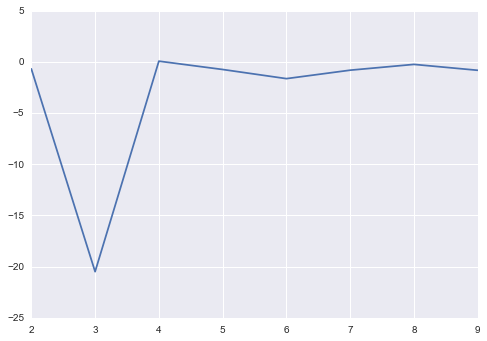

In [1179]:
plt.plot(alphas, means)

In [ ]:
a.

In [1051]:
step1 = Zip_Code_Transform(dfM)
step2 = combined

In [1053]:
step1.transform(Xf,yf);

In [47]:
df.to_csv("zip_code_data.csv", index = False)

In [21]:
tt = tt.drop_duplicates(subset = ["zip_code"])

In [18]:
tt = bank_data[1]